# Amostragem

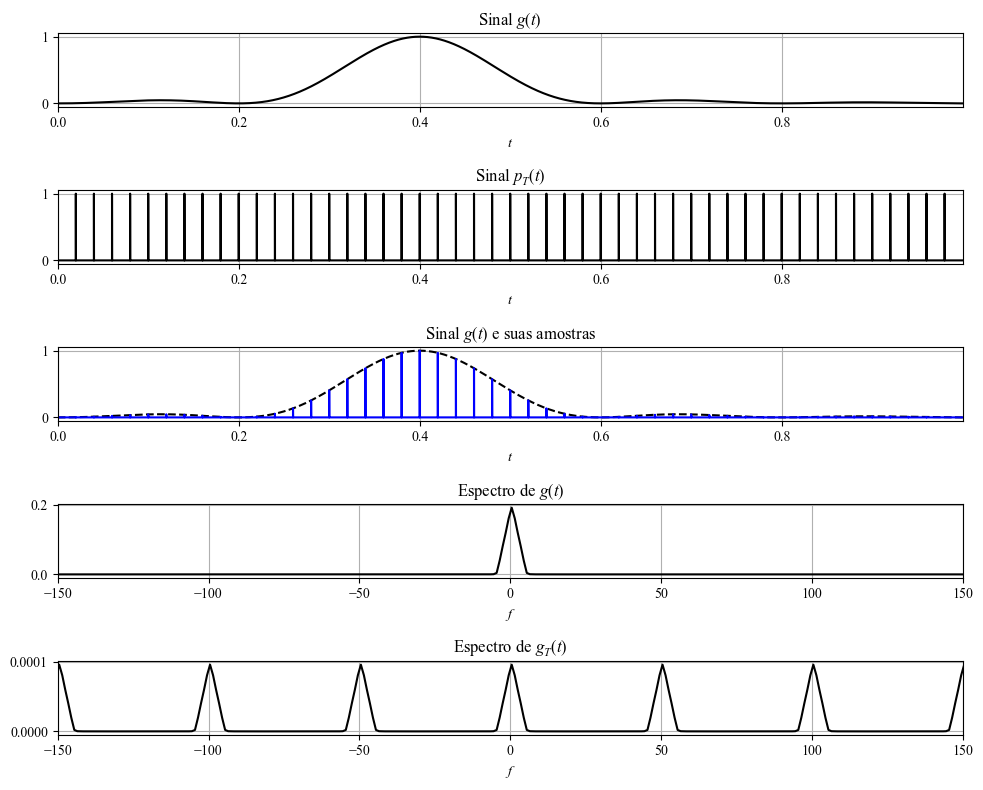

In [5]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

# Parâmetros de Simulação
Td = 1e-5
time = 1.0
t = np.arange(0,time,Td)

###############################################################################################
# Amostragem Ideal
###############################################################################################
# Funcao g = sinc(5*pi*(t - 0.4))^2 e sua transformada de Fourier
g = np.sinc(5*(t-0.4))**2
f,Gf = ctft(g,Td)

# Amostragem de g(t)
Fs = 50
Ts = 1/Fs
N = len(g)
nFac = int(np.round(Ts/Td))         # A cada nFac valores de g(t) teremos uma amostra de gT(t)
pT = np.zeros_like(g)
pT[0::nFac] = 1
gT = g*pT
# gT = np.zeros(N)
# gT[0::nFac] = g[0::nFac]
f,GTf = ctft(gT,Td)

# Plots
plt.figure(figsize=(10,8))

plt.subplot(5,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$')
plt.xlim(min(t),max(t))
plt.grid()

plt.subplot(5,1,2)
plt.plot(t,pT,'k')
plt.xlabel('$t$')
plt.title('Sinal $p_T(t)$')
plt.xlim(min(t),max(t))
plt.grid()

plt.subplot(5,1,3)
plt.plot(t,g,'--k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e suas amostras')
plt.plot(t,gT,'b')
plt.xlim(min(t),max(t))
plt.grid()

plt.subplot(5,1,4)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')
plt.grid()

plt.subplot(5,1,5)
plt.plot(f,abs(GTf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_T(t)$')
plt.grid()
plt.tight_layout()

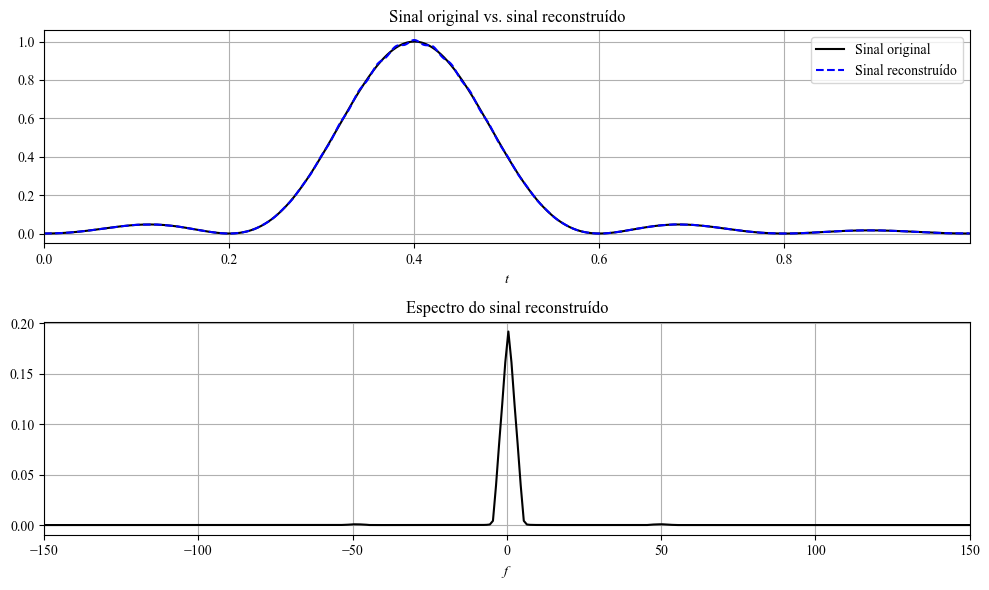

In [6]:
###############################################################################################
# Reconstrução Ideal
###############################################################################################
#Filtro Passa-Baixas
Fc = Fs/2                                              # frequência de corte
ordem = 4                                             # ordem do filtro
Fd = 1/Td
Wn =  Fc / (Fd/2)                                      # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass') # cálculo dos coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, gT)
f,G_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)
plt.grid()

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_ideal),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.grid()
plt.tight_layout()

plt.show()

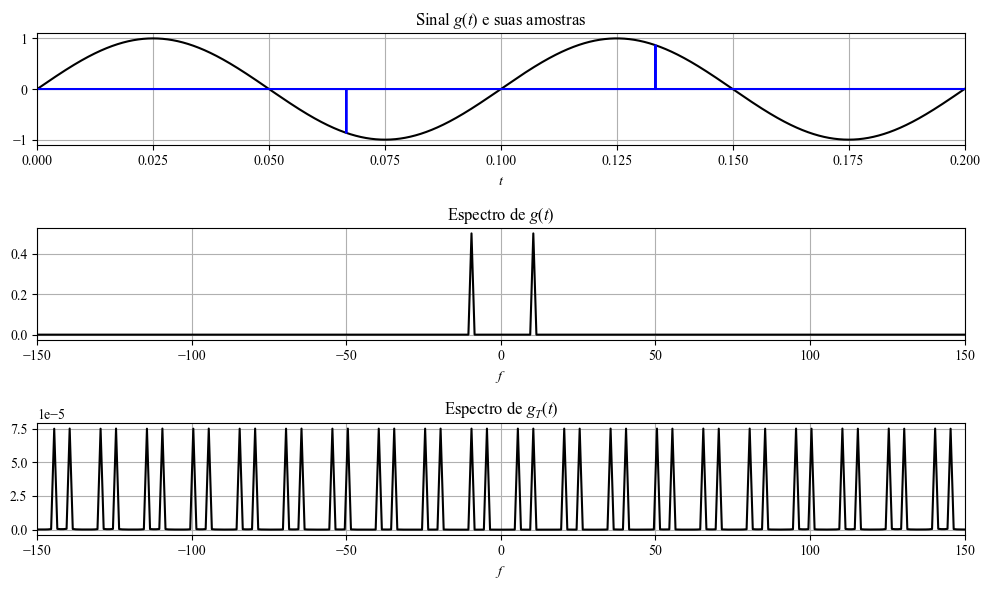

In [11]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parâmetros de Simulação
Td = 1e-5
time = 1.0
t = np.arange(0,time,Td)

###############################################################################################
# Amostragem Ideal
###############################################################################################
g = np.sin(2*np.pi*10*t)
f,Gf = ctft(g,Td)

Fs = 15
Ts = 1/Fs
N = len(g)
nFac = int(np.round(Ts/Td))
pT = np.zeros_like(g)
pT[0::nFac] = 1
gT = g*pT
f,GTf = ctft(gT,Td)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e suas amostras')
plt.plot(t,gT,'b')
plt.xlim(0,0.2)
plt.grid()

plt.subplot(3,1,2)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')
plt.grid()

plt.subplot(3,1,3)
plt.plot(f,abs(GTf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_T(t)$')
plt.grid()
plt.tight_layout()

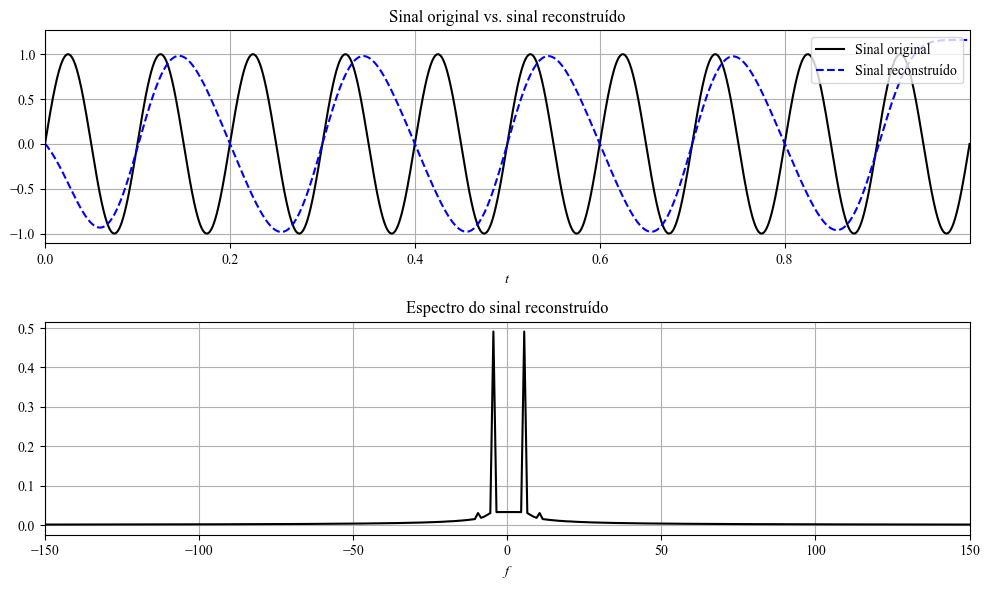

In [12]:
###############################################################################################
# Reconstrução Ideal
###############################################################################################
#Filtro Passa-Baixas
Fc = Fs/2                                              # frequência de corte
ordem = 4                                              # ordem do filtro
Fd = 1/Td
Wn =  Fc / (Fd/2)                                      # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass') # cálculo dos coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, gT)
f,G_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)
plt.grid()

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_ideal),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.grid()
plt.tight_layout()

plt.show()